In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats # For xgboost classifier
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
dataset=pd.read_csv('D:\Data Science\Data Science\Data Trained\Assignments and Projects\creditcardfraud\creditcard.csv')

In [3]:
dataset.sample(5)

Time         V1        V2        V3        V4        V5        V6  \
250083  154718.0  -0.087806  0.028723  0.115614  1.100953  0.871318 -0.366487   
123443   76928.0 -11.753533  7.634240 -3.635469 -0.662712 -5.468180  0.734296   
239658  150208.0  -0.539745 -0.387657  1.291936 -2.355533 -0.262664  0.059326   
67969    52770.0  -2.340252  2.643786 -0.912149 -0.336278 -0.626539 -0.252499   
267467  162785.0  -0.852286 -0.058209  1.026914 -2.709602  0.595598  1.085031   

              V7        V8        V9  ...       V21       V22       V23  \
250083  0.306987 -0.039475 -0.655085  ... -0.003229 -0.053303  0.255517   
123443 -3.722815  4.338143  4.860929  ... -1.290573 -0.814665  0.286811   
239658 -0.006335  0.231688 -0.946937  ...  0.478398  1.108237 -0.099349   
67969  -0.818820  1.827669 -0.843911  ... -0.197117 -0.809579  0.066292   
267467  0.011990  0.630467 -0.980682  ...  0.206064  0.555009 -0.450616   

             V24       V25       V26       V27       V28  Amount  Class  
250083 -0.457234 -1.171601  0.592719  0.188865  0.234108   49.35      0  
123443 -0.064855  2.080841 -0.016541  2.028054  1.009276   20.00      0  
239658  0.709267 -0.044872 -0.232999  0.082724  0.134718   69.00      0  
67969  -0.885999  0.253324  0.146934  0.065690 -0.000008    0.89      0  
267467 -1.682079  0.637756  0.015484  0.261468  0.067882   12.00      0  

[5 rows x 31 columns]

In [4]:
dataset.shape[0]

284807

In [5]:
dataset.shape[1]

31

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [7]:
pd.set_option('precision',3)
dataset.loc[:,['Time', 'Amount']].describe()

Time      Amount
count  284807.000  284807.000
mean    94813.860      88.350
std     47488.146     250.120
min         0.000       0.000
25%     54201.500       5.600
50%     84692.000      22.000
75%    139320.500      77.165
max    172792.000   25691.160

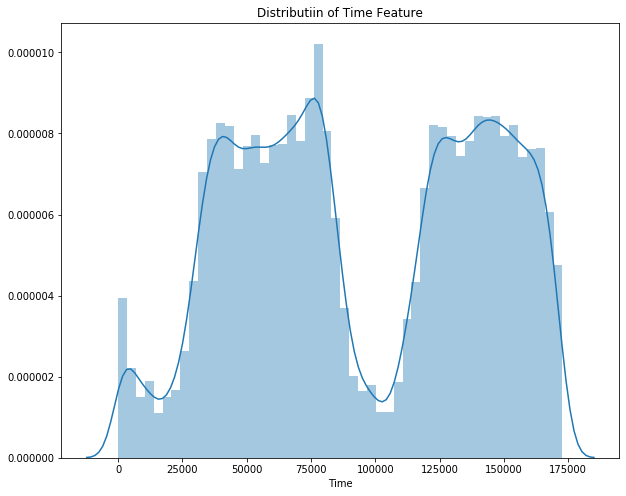

In [8]:
plt.figure(figsize=(10,8))
plt.title('Distributiin of Time Feature')
sns.distplot(dataset.Time)

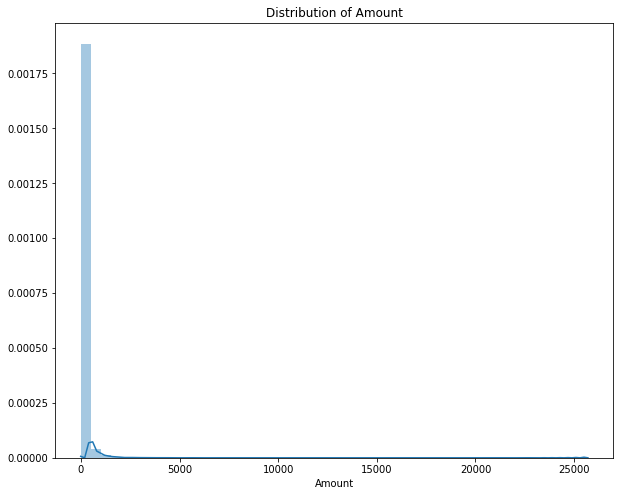

In [9]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Amount')
sns.distplot(dataset.Amount)

In [10]:
LabelCount=dataset.Class.value_counts()

In [11]:
LabelCount

0    284315
1       492
Name: Class, dtype: int64

In [12]:
normal=LabelCount[0]
fraud=LabelCount[1]
perc_normal=(normal/(normal+fraud))*100
perc_fraud=(fraud/(normal+fraud))*100
print('There are {} normal transactions with ({:.3f}%)) and {} fraudelent transactions with ({:.3f}%)'.format(normal,perc_normal, fraud, perc_fraud))

There are 284315 normal transactions with (99.827%)) and 492 fraudelent transactions with (0.173%)


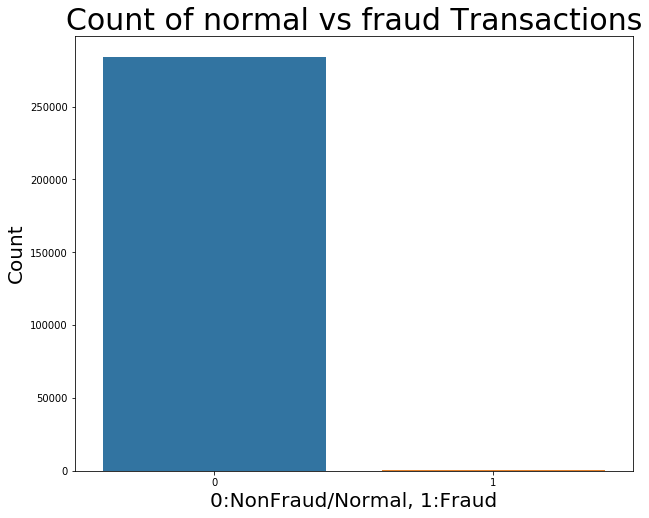

In [13]:
plt.figure(figsize=(10,8))
sns.barplot(x=LabelCount.index, y=LabelCount)
plt.title('Count of normal vs fraud Transactions',size=30)
plt.xlabel('0:NonFraud/Normal, 1:Fraud',size=20)
plt.ylabel('Count',size=20)
plt.show()


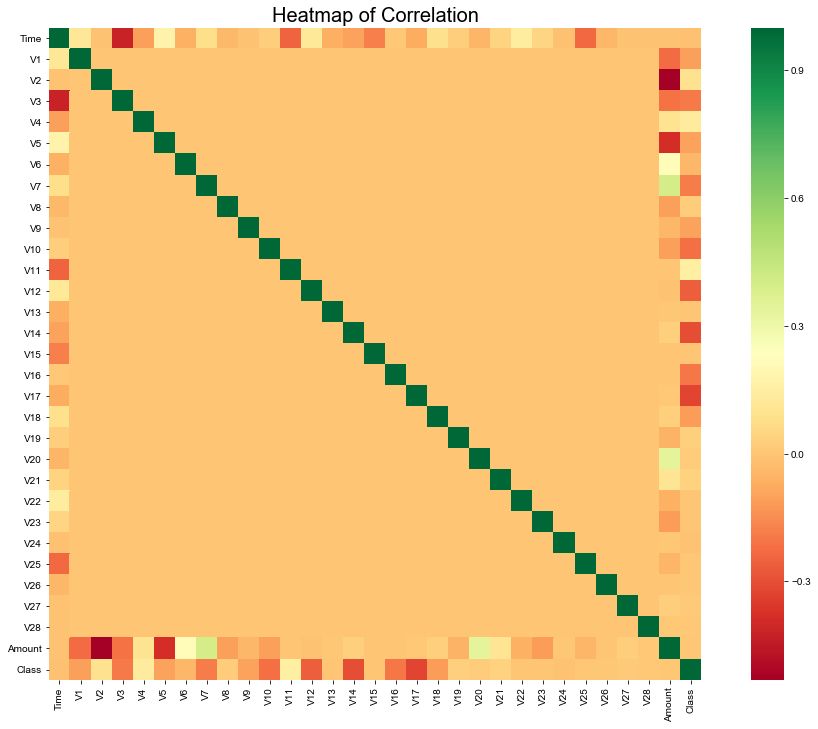

In [14]:
plt.figure(figsize=(18,12))
plt.title('Heatmap of Correlation', size=20)
sns.heatmap(dataset.corr(),cmap='RdYlGn',square=True)
sns.set(font_scale=2)

In [15]:
skew=dataset.skew()

In [16]:
skew

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

In [17]:

scaler=StandardScaler()

In [18]:
scaled_time=scaler.fit_transform(dataset[['Time']])
list1=[item for sublist in scaled_time.tolist() for item in sublist]
scaled_time=pd.Series(list1)

In [19]:
scaled_amount=scaler.fit_transform(dataset[['Amount']])
list2=[item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount=pd.Series(list2)

In [20]:
dataset=pd.concat([dataset, scaled_time], axis=1)

In [21]:
dataset.head()

Time     V1     V2     V3     V4     V5     V6     V7     V8     V9  ...  \
0   0.0 -1.360 -0.073  2.536  1.378 -0.338  0.462  0.240  0.099  0.364  ...   
1   0.0  1.192  0.266  0.166  0.448  0.060 -0.082 -0.079  0.085 -0.255  ...   
2   1.0 -1.358 -1.340  1.773  0.380 -0.503  1.800  0.791  0.248 -1.515  ...   
3   1.0 -0.966 -0.185  1.793 -0.863 -0.010  1.247  0.238  0.377 -1.387  ...   
4   2.0 -1.158  0.878  1.549  0.403 -0.407  0.096  0.593 -0.271  0.818  ...   

     V22    V23    V24    V25    V26    V27    V28  Amount  Class      0  
0  0.278 -0.110  0.067  0.129 -0.189  0.134 -0.021  149.62      0 -1.997  
1 -0.639  0.101 -0.340  0.167  0.126 -0.009  0.015    2.69      0 -1.997  
2  0.772  0.909 -0.689 -0.328 -0.139 -0.055 -0.060  378.66      0 -1.997  
3  0.005 -0.190 -1.176  0.647 -0.222  0.063  0.061  123.50      0 -1.997  
4  0.798 -0.137  0.141 -0.206  0.502  0.219  0.215   69.99      0 -1.997  

[5 rows x 32 columns]

In [22]:
dataset=pd.concat([dataset, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)

In [23]:
dataset.head()

Time     V1     V2     V3     V4     V5     V6     V7     V8     V9  ...  \
0   0.0 -1.360 -0.073  2.536  1.378 -0.338  0.462  0.240  0.099  0.364  ...   
1   0.0  1.192  0.266  0.166  0.448  0.060 -0.082 -0.079  0.085 -0.255  ...   
2   1.0 -1.358 -1.340  1.773  0.380 -0.503  1.800  0.791  0.248 -1.515  ...   
3   1.0 -0.966 -0.185  1.793 -0.863 -0.010  1.247  0.238  0.377 -1.387  ...   
4   2.0 -1.158  0.878  1.549  0.403 -0.407  0.096  0.593 -0.271  0.818  ...   

     V24    V25    V26    V27    V28  Amount  Class      0  scaled_amount  \
0  0.067  0.129 -0.189  0.134 -0.021  149.62      0 -1.997          0.245   
1 -0.340  0.167  0.126 -0.009  0.015    2.69      0 -1.997         -0.342   
2 -0.689 -0.328 -0.139 -0.055 -0.060  378.66      0 -1.997          1.161   
3 -1.176  0.647 -0.222  0.063  0.061  123.50      0 -1.997          0.141   
4  0.141 -0.206  0.502  0.219  0.215   69.99      0 -1.997         -0.073   

   scaled_time  
0       -1.997  
1       -1.997  
2       -1.997  
3       -1.997  
4       -1.997  

[5 rows x 34 columns]

In [24]:
dataset.drop(['Amount', 'Time'], axis=1, inplace=True)

In [25]:
dataset.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  ...  \
0 -1.360 -0.073  2.536  1.378 -0.338  0.462  0.240  0.099  0.364  0.091  ...   
1  1.192  0.266  0.166  0.448  0.060 -0.082 -0.079  0.085 -0.255 -0.167  ...   
2 -1.358 -1.340  1.773  0.380 -0.503  1.800  0.791  0.248 -1.515  0.208  ...   
3 -0.966 -0.185  1.793 -0.863 -0.010  1.247  0.238  0.377 -1.387 -0.055  ...   
4 -1.158  0.878  1.549  0.403 -0.407  0.096  0.593 -0.271  0.818  0.753  ...   

     V23    V24    V25    V26    V27    V28  Class      0  scaled_amount  \
0 -0.110  0.067  0.129 -0.189  0.134 -0.021      0 -1.997          0.245   
1  0.101 -0.340  0.167  0.126 -0.009  0.015      0 -1.997         -0.342   
2  0.909 -0.689 -0.328 -0.139 -0.055 -0.060      0 -1.997          1.161   
3 -0.190 -1.176  0.647 -0.222  0.063  0.061      0 -1.997          0.141   
4 -0.137  0.141 -0.206  0.502  0.219  0.215      0 -1.997         -0.073   

   scaled_time  
0       -1.997  
1       -1.997  
2       -1.997  
3       -1.997  
4       -1.997  

[5 rows x 32 columns]

In [26]:
mask=np.random.rand(len(dataset))<0.9
train=dataset[mask]

In [27]:
test=dataset[~mask]

In [28]:
train.shape

(256139, 32)

In [29]:
test.shape

(28668, 32)

In [30]:
train.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  ...  \
0 -1.360 -0.073  2.536  1.378 -0.338  0.462  0.240  0.099  0.364  0.091  ...   
1  1.192  0.266  0.166  0.448  0.060 -0.082 -0.079  0.085 -0.255 -0.167  ...   
2 -1.358 -1.340  1.773  0.380 -0.503  1.800  0.791  0.248 -1.515  0.208  ...   
3 -0.966 -0.185  1.793 -0.863 -0.010  1.247  0.238  0.377 -1.387 -0.055  ...   
4 -1.158  0.878  1.549  0.403 -0.407  0.096  0.593 -0.271  0.818  0.753  ...   

     V23    V24    V25    V26    V27    V28  Class      0  scaled_amount  \
0 -0.110  0.067  0.129 -0.189  0.134 -0.021      0 -1.997          0.245   
1  0.101 -0.340  0.167  0.126 -0.009  0.015      0 -1.997         -0.342   
2  0.909 -0.689 -0.328 -0.139 -0.055 -0.060      0 -1.997          1.161   
3 -0.190 -1.176  0.647 -0.222  0.063  0.061      0 -1.997          0.141   
4 -0.137  0.141 -0.206  0.502  0.219  0.215      0 -1.997         -0.073   

   scaled_time  
0       -1.997  
1       -1.997  
2       -1.997  
3       -1.997  
4       -1.997  

[5 rows x 32 columns]

In [31]:
test.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  ...  \
6   1.230  0.141  0.045  1.203  0.192  0.273 -0.005  0.081  0.465 -0.099  ...   
7  -0.644  1.418  1.074 -0.492  0.949  0.428  1.121 -3.808  0.615  1.249  ...   
15 -0.752  0.345  2.057 -1.469 -1.158 -0.078 -0.609  0.004 -0.436  0.748  ...   
20  0.695 -1.362  1.029  0.834 -1.191  1.309 -0.879  0.445 -0.446  0.569  ...   
26  1.173  0.353  0.284  1.134 -0.173 -0.916  0.369 -0.327 -0.247 -0.046  ...   

      V23    V24    V25    V26    V27    V28  Class      0  scaled_amount  \
6  -0.154 -0.780  0.750 -0.257  0.035  0.005      0 -1.996         -0.333   
7   0.058 -0.650 -0.415 -0.052 -1.207 -1.085      0 -1.996         -0.190   
15 -0.257 -0.065 -0.039 -0.087 -0.181  0.129      0 -1.996         -0.289   
20 -0.051 -0.304  0.072 -0.422  0.087  0.063      0 -1.996          0.573   
26 -0.150  0.435  0.725 -0.337  0.016  0.030      0 -1.996         -0.186   

    scaled_time  
6        -1.996  
7        -1.996  
15       -1.996  
20       -1.996  
26       -1.996  

[5 rows x 32 columns]

In [32]:
train.reset_index(drop=True, inplace=True)

In [33]:
train.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  ...  \
0 -1.360 -0.073  2.536  1.378 -0.338  0.462  0.240  0.099  0.364  0.091  ...   
1  1.192  0.266  0.166  0.448  0.060 -0.082 -0.079  0.085 -0.255 -0.167  ...   
2 -1.358 -1.340  1.773  0.380 -0.503  1.800  0.791  0.248 -1.515  0.208  ...   
3 -0.966 -0.185  1.793 -0.863 -0.010  1.247  0.238  0.377 -1.387 -0.055  ...   
4 -1.158  0.878  1.549  0.403 -0.407  0.096  0.593 -0.271  0.818  0.753  ...   

     V23    V24    V25    V26    V27    V28  Class      0  scaled_amount  \
0 -0.110  0.067  0.129 -0.189  0.134 -0.021      0 -1.997          0.245   
1  0.101 -0.340  0.167  0.126 -0.009  0.015      0 -1.997         -0.342   
2  0.909 -0.689 -0.328 -0.139 -0.055 -0.060      0 -1.997          1.161   
3 -0.190 -1.176  0.647 -0.222  0.063  0.061      0 -1.997          0.141   
4 -0.137  0.141 -0.206  0.502  0.219  0.215      0 -1.997         -0.073   

   scaled_time  
0       -1.997  
1       -1.997  
2       -1.997  
3       -1.997  
4       -1.997  

[5 rows x 32 columns]

In [34]:
test.reset_index(drop=True,inplace=True)

In [35]:
test.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  ...  \
0  1.230  0.141  0.045  1.203  0.192  0.273 -0.005  0.081  0.465 -0.099  ...   
1 -0.644  1.418  1.074 -0.492  0.949  0.428  1.121 -3.808  0.615  1.249  ...   
2 -0.752  0.345  2.057 -1.469 -1.158 -0.078 -0.609  0.004 -0.436  0.748  ...   
3  0.695 -1.362  1.029  0.834 -1.191  1.309 -0.879  0.445 -0.446  0.569  ...   
4  1.173  0.353  0.284  1.134 -0.173 -0.916  0.369 -0.327 -0.247 -0.046  ...   

     V23    V24    V25    V26    V27    V28  Class      0  scaled_amount  \
0 -0.154 -0.780  0.750 -0.257  0.035  0.005      0 -1.996         -0.333   
1  0.058 -0.650 -0.415 -0.052 -1.207 -1.085      0 -1.996         -0.190   
2 -0.257 -0.065 -0.039 -0.087 -0.181  0.129      0 -1.996         -0.289   
3 -0.051 -0.304  0.072 -0.422  0.087  0.063      0 -1.996          0.573   
4 -0.150  0.435  0.725 -0.337  0.016  0.030      0 -1.996         -0.186   

   scaled_time  
0       -1.996  
1       -1.996  
2       -1.996  
3       -1.996  
4       -1.996  

[5 rows x 32 columns]

In [36]:
train.Class.value_counts()

0    255703
1       436
Name: Class, dtype: int64

In [37]:
fraud=train[train['Class']==1]


In [38]:
normal=train[train['Class']==0]

In [39]:
selected=normal.sample(len(fraud))

In [40]:
normal.shape

(255703, 32)

In [41]:
fraud.shape

(436, 32)

In [42]:
selected.shape

(436, 32)

In [43]:
fraud.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
480  -2.312  1.952 -1.610  3.998 -0.522 -1.427 -2.537  1.392 -2.770 -2.772   
554  -3.044 -3.157  1.088  2.289  1.360 -1.065  0.326 -0.068 -0.271 -0.839   
4414 -2.303  1.759 -0.360  2.330 -0.822 -0.076  0.562 -0.399 -0.238 -1.525   
5464 -4.398  1.358 -2.593  2.680 -1.128 -1.707 -3.496 -0.249 -0.248 -4.802   
5667  1.234  3.020 -4.305  4.733  3.624 -1.358  1.713 -0.496 -1.283 -2.447   

      ...    V23    V24    V25    V26    V27    V28  Class      0  \
480   ... -0.465  0.320  0.045  0.178  0.261 -0.143      1 -1.988   
554   ...  1.376 -0.294  0.280 -0.145 -0.253  0.036      1 -1.987   
4414  ...  0.173 -0.087 -0.156 -0.543  0.040 -0.153      1 -1.903   
5464  ... -0.436 -0.054  0.252 -0.657 -0.827  0.850      1 -1.849   
5667  ... -0.657 -1.633  1.489  0.567 -0.010  0.147      1 -1.838   

      scaled_amount  scaled_time  
480          -0.353       -1.988  
554           1.762       -1.987  
4414          0.606       -1.903  
5464         -0.117       -1.849  
5667         -0.349       -1.838  

[5 rows x 32 columns]

In [44]:
selected.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
143658  2.015  0.284 -1.830  1.268  0.546 -1.416  0.830 -0.507 -0.123  0.363   
120487 -0.676  1.236  1.373  0.878 -0.078  0.182  0.158  0.532 -0.774 -0.525   
65739  -2.316  0.191  1.170 -2.388 -2.198  0.537 -1.837  1.668 -2.139  0.496   
183163  1.118 -1.510 -3.063  0.738  0.393 -0.950  1.490 -0.523 -0.342  0.226   
93538   1.175 -0.085 -0.256 -0.220 -0.149 -0.889  0.349 -0.192 -0.257 -0.035   

        ...    V23    V24    V25    V26    V27    V28  Class      0  \
143658  ... -0.025 -0.018  0.442 -0.483 -0.035 -0.060      0  0.384   
120487  ... -0.137 -0.027 -0.110 -0.484  0.047  0.069      0 -0.298   
65739   ... -0.139 -0.304  0.380 -0.234  0.006 -0.098      0 -0.838   
183163  ... -0.594  0.865  0.445  0.616 -0.236 -0.009      0  0.847   
93538   ...  0.045  0.037  0.185  0.733 -0.128 -0.004      0 -0.546   

        scaled_amount  scaled_time  
143658         -0.239        0.384  
120487         -0.349       -0.298  
65739          -0.173       -0.838  
183163          1.706        0.847  
93538          -0.074       -0.546  

[5 rows x 32 columns]

In [45]:
fraud.reset_index(drop=True, inplace=True)

In [46]:
selected.reset_index(drop=True, inplace=True)

In [47]:
subsample=pd.concat([selected, fraud])

In [48]:
subsample.head(10)

V1      V2     V3     V4     V5     V6     V7     V8     V9    V10  ...  \
0  2.015   0.284 -1.830  1.268  0.546 -1.416  0.830 -0.507 -0.123  0.363  ...   
1 -0.676   1.236  1.373  0.878 -0.078  0.182  0.158  0.532 -0.774 -0.525  ...   
2 -2.316   0.191  1.170 -2.388 -2.198  0.537 -1.837  1.668 -2.139  0.496  ...   
3  1.118  -1.510 -3.063  0.738  0.393 -0.950  1.490 -0.523 -0.342  0.226  ...   
4  1.175  -0.085 -0.256 -0.220 -0.149 -0.889  0.349 -0.192 -0.257 -0.035  ...   
5  0.069   0.221 -3.542 -3.225  3.089  2.324  0.407  0.890 -1.660  0.296  ...   
6 -9.140 -10.141 -1.447  5.814  2.602 -2.506 -2.294  0.582 -0.030  0.455  ...   
7 -0.672   0.957  1.473 -0.587  0.605 -0.596  0.756  0.026 -0.857 -0.830  ...   
8  1.350  -0.400  0.249 -0.659 -0.877 -1.222 -0.175 -0.319 -1.076  0.591  ...   
9  1.965  -0.268 -1.386  0.274 -0.092 -1.228  0.270 -0.399  0.389  0.133  ...   

     V23        V24    V25    V26    V27    V28  Class      0  scaled_amount  \
0 -0.025 -1.801e-02  0.442 -0.483 -0.035 -0.060      0  0.384         -0.239   
1 -0.137 -2.675e-02 -0.110 -0.484  0.047  0.069      0 -0.298         -0.349   
2 -0.139 -3.040e-01  0.380 -0.234  0.006 -0.098      0 -0.838         -0.173   
3 -0.594  8.649e-01  0.445  0.616 -0.236 -0.009      0  0.847          1.706   
4  0.045  3.672e-02  0.185  0.733 -0.128 -0.004      0 -0.546         -0.074   
5 -0.013  7.895e-01 -0.936 -0.109  0.407  0.289      0  1.057         -0.273   
6 -2.533  3.871e-01 -3.028 -0.524  2.245 -2.721      0  1.374          2.886   
7 -0.134 -4.112e-02 -0.114 -0.056  0.038  0.105      0 -0.496         -0.345   
8  0.174  3.416e-01  0.198 -0.648 -0.012  0.027      0 -0.514         -0.162   
9 -0.009 -6.833e-04  0.034  0.788 -0.097 -0.061      0  0.625         -0.094   

   scaled_time  
0        0.384  
1       -0.298  
2       -0.838  
3        0.847  
4       -0.546  
5        1.057  
6        1.374  
7       -0.496  
8       -0.514  
9        0.625  

[10 rows x 32 columns]

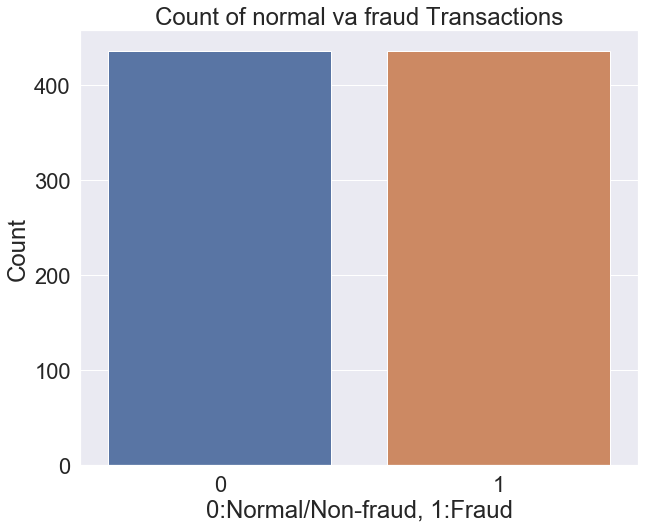

In [49]:
new_label_count=subsample.Class.value_counts()
plt.figure(figsize=(10,8))
sns.barplot(x=new_label_count.index, y=new_label_count)
plt.title('Count of normal va fraud Transactions')
plt.ylabel('Count')
plt.xlabel('0:Normal/Non-fraud, 1:Fraud')
plt.show()

In [50]:
corr=subsample.corr()
corr=corr[['Class']]
corr

Class
V1            -0.432
V2             0.479
V3            -0.559
V4             0.704
V5            -0.366
V6            -0.365
V7            -0.466
V8             0.046
V9            -0.544
V10           -0.621
V11            0.702
V12           -0.689
V13           -0.063
V14           -0.750
V15           -0.030
V16           -0.592
V17           -0.550
V18           -0.459
V19            0.273
V20            0.161
V21            0.123
V22            0.011
V23            0.043
V24           -0.102
V25            0.046
V26            0.027
V27            0.055
V28            0.103
Class          1.000
0             -0.177
scaled_amount  0.062
scaled_time   -0.177

In [51]:
corr[corr.Class<-0.5]

Class
V3  -0.559
V9  -0.544
V10 -0.621
V12 -0.689
V14 -0.750
V16 -0.592
V17 -0.550

In [52]:
corr[corr.Class>0.5]

Class
V4     0.704
V11    0.702
Class  1.000

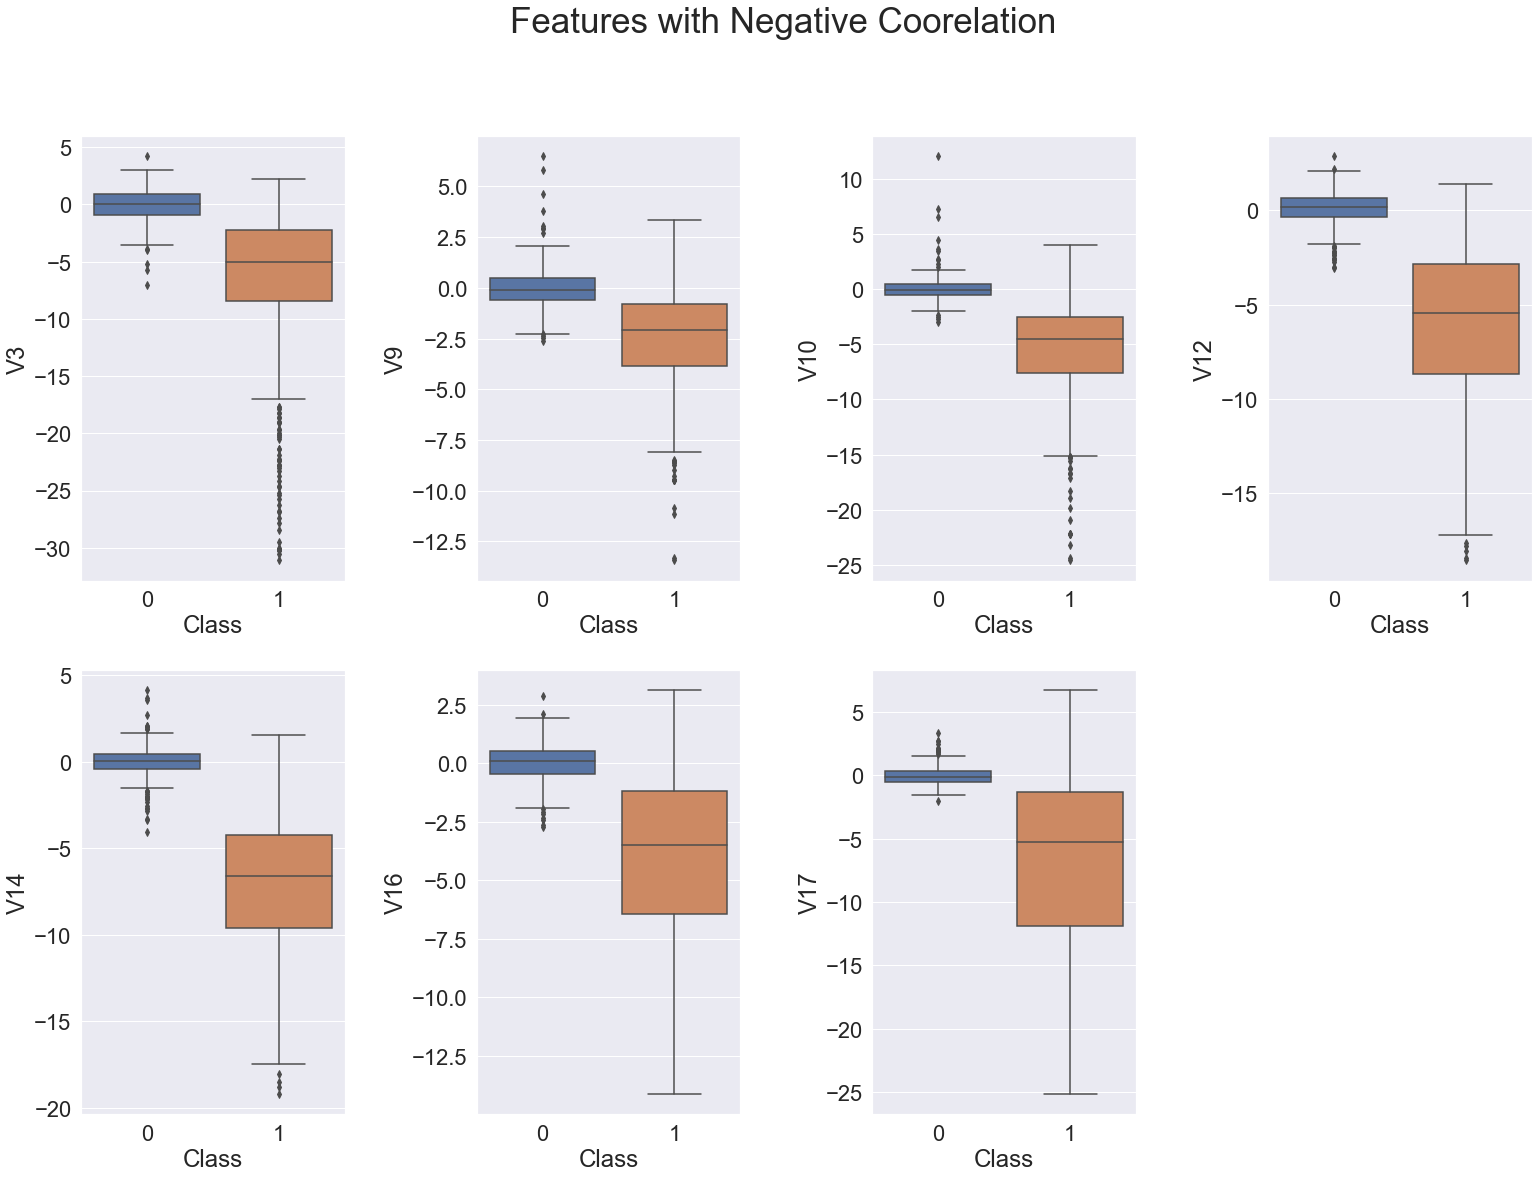

In [53]:
fig, axes=plt.subplots(nrows=2, ncols=4, figsize=(26,18))
plt.subplots_adjust(wspace=0.5)
fig.suptitle('Features with Negative Coorelation', size=35)
sns.boxplot(x='Class',y='V3',data=subsample,ax=axes[0,0])
sns.boxplot(x='Class',y='V9',data=subsample,ax=axes[0,1])
sns.boxplot(x='Class',y='V10',data=subsample,ax=axes[0,2])
sns.boxplot(x='Class',y='V12',data=subsample,ax=axes[0,3])
sns.boxplot(x='Class',y='V14',data=subsample,ax=axes[1,0])
sns.boxplot(x='Class',y='V16',data=subsample,ax=axes[1,1])
sns.boxplot(x='Class',y='V17',data=subsample,ax=axes[1,2])
fig.delaxes(axes[1,3])

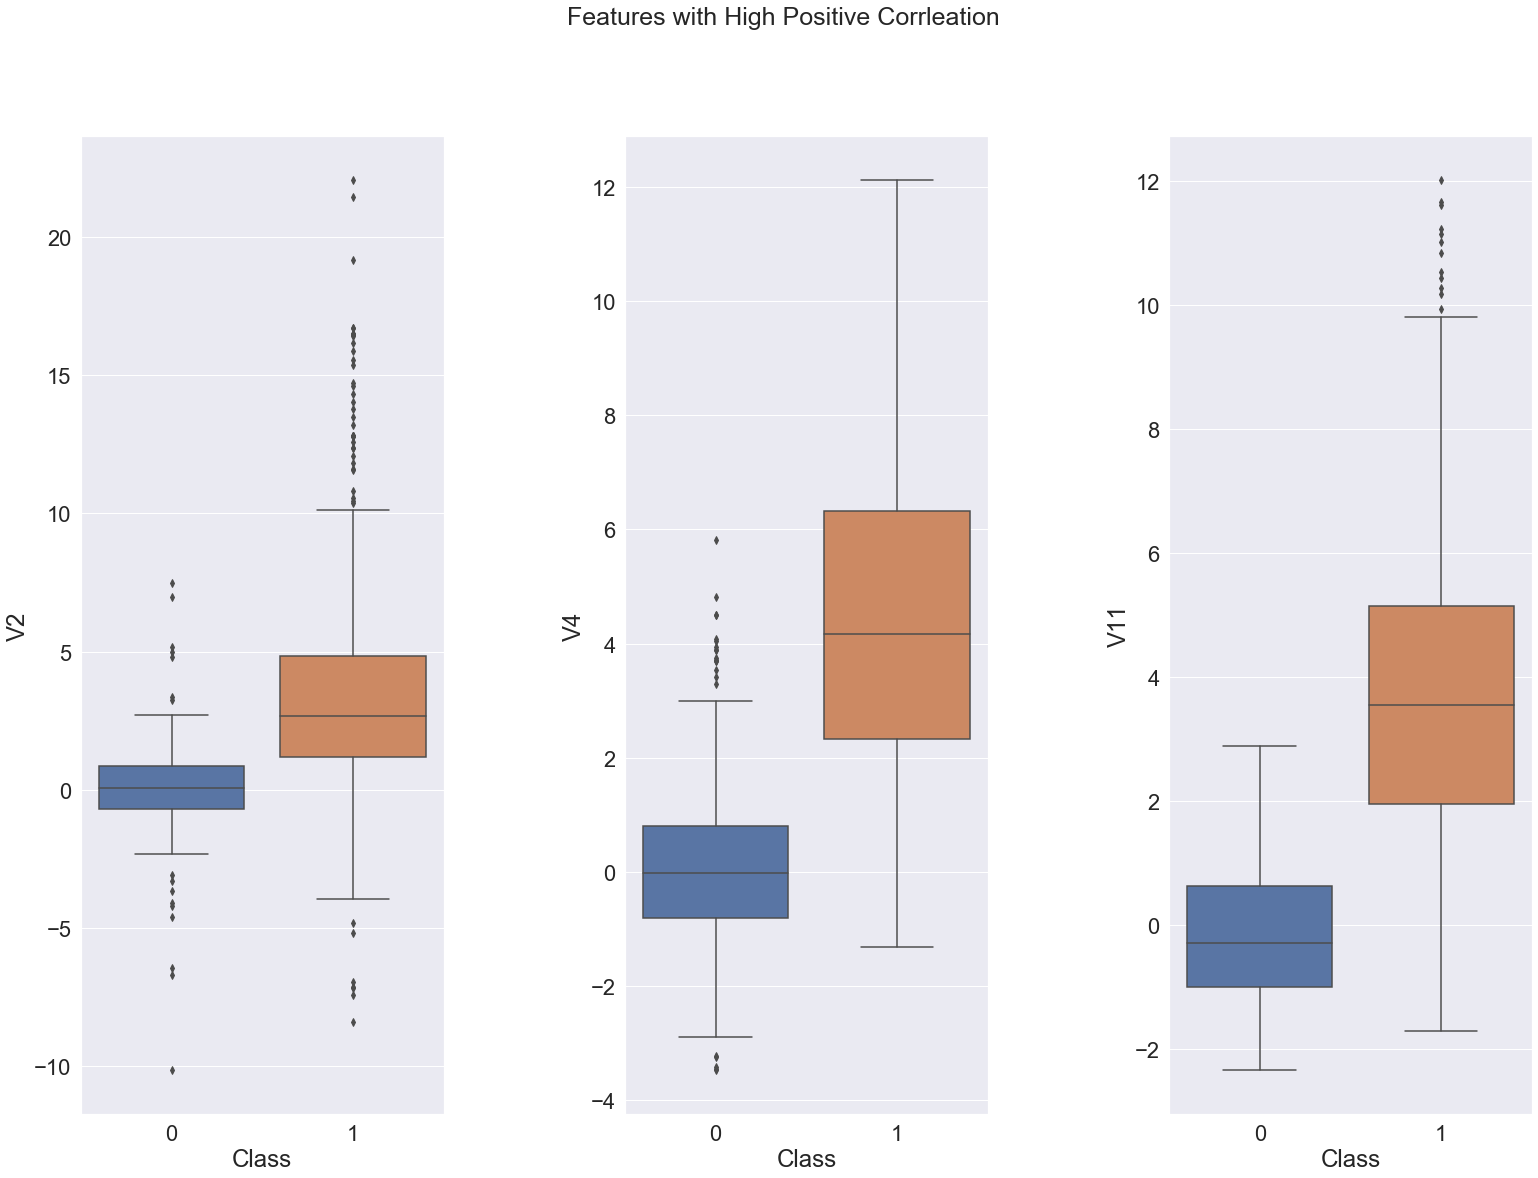

In [54]:
fig, axes=plt.subplots(nrows=1, ncols=3, figsize=(26,18))
plt.subplots_adjust(wspace=0.5)
fig.suptitle('Features with High Positive Corrleation', size=25)
sns.boxplot(x='Class', y='V2', data=subsample,ax=axes[0]) 
sns.boxplot(x='Class', y='V4', data=subsample,ax=axes[1])
sns.boxplot(x='Class', y='V11', data=subsample,ax=axes[2])

In [55]:
#Extreme Outlirer Removal
Q1=subsample.quantile(0.25)
Q3=subsample.quantile(0.75)
IQR=Q3 - Q1
dataset2=subsample[~((subsample< (Q1- 2.5*IQR)) | (subsample> (Q3+ 2.5*IQR))).any(axis=1)]


In [56]:
len_after=len(dataset2)
len_before=len(subsample)
len_diff=len(subsample)-len(dataset2)
print('We reduced our data size from {} transactions to {} transactions. The data size is reduced by {}'.format(len_before,len_after, len_diff))

We reduced our data size from 872 transactions to 612 transactions. The data size is reduced by 260


In [57]:
#Dimensionality Reduction
from sklearn.manifold import TSNE
X=dataset2.drop('Class', axis=1)
y=dataset2['Class']

In [58]:
type(X)

pandas.core.frame.DataFrame

In [59]:
type(y)

pandas.core.series.Series

In [60]:
X.values

array([[ 2.01527545,  0.28354603, -1.83025753, ...,  0.38397314,
        -0.23904405,  0.38397314],
       [-0.67631937,  1.23632702,  1.3731858 , ..., -0.2980509 ,
        -0.34923131, -0.2980509 ],
       [-2.31550268,  0.19141547,  1.17022466, ..., -0.8375549 ,
        -0.17331551, -0.8375549 ],
       ...,
       [ 1.378559  ,  1.28938094, -5.00424678, ...,  1.56951319,
        -0.35019085,  1.56951319],
       [-0.67614267,  1.12636606, -2.21369952, ...,  1.56959742,
        -0.04181846,  1.56959742],
       [ 1.9919761 ,  0.15847589, -2.58344065, ...,  1.59059217,
        -0.18319079,  1.59059217]])

In [61]:
X_reduced_tsne=TSNE(n_components=2, random_state=42).fit_transform(X.values)

In [62]:
X_reduced_tsne

array([[ 20.601501 ,  13.578056 ],
       [ -7.4080462,   6.013073 ],
       [-22.912212 ,  14.606129 ],
       ...,
       [ -1.7186755, -47.96789  ],
       [ -3.328826 , -51.83789  ],
       [ 17.313309 ,   7.8323145]], dtype=float32)

In [63]:
X_reduced_tsne.shape

(612, 2)

In [64]:
#pd.DataFrame(X_reduced_tsne).head()

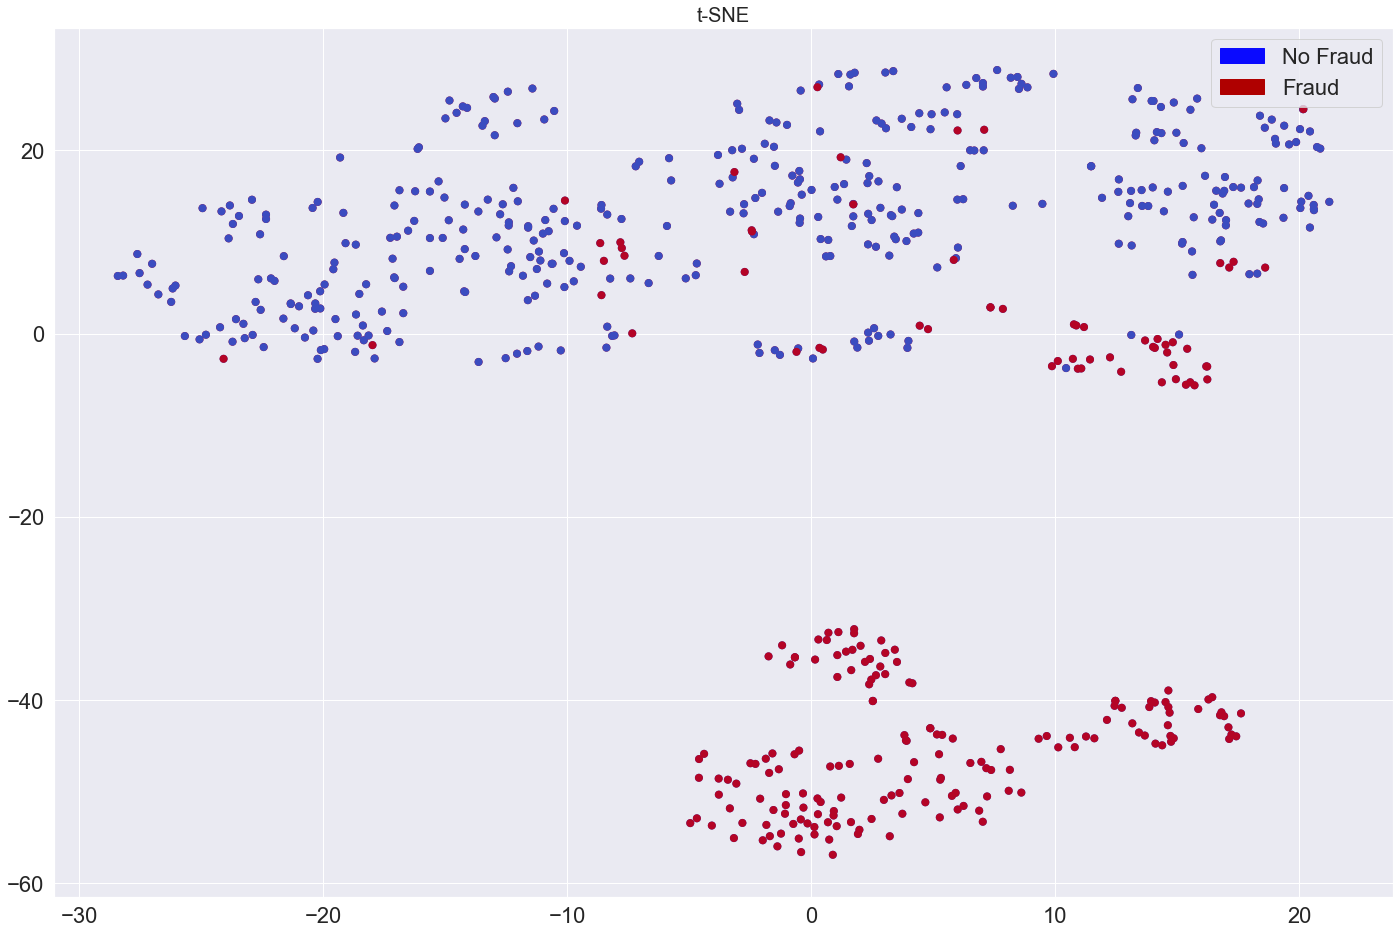

In [65]:
import matplotlib.patches as mpatches
blue_patch= mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch=mpatches.Patch(color='#AF0000', label='Fraud')
fig, ax= plt.subplots(figsize=(24,16))
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y==0), cmap='coolwarm',label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1],c=(y==1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=20)
ax.grid(True)
ax.legend(handles=[blue_patch, red_patch])

In [66]:
#Classification ALgorithms

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)


In [68]:
X_train=X_train.values

In [69]:
X_test=X_test.values

In [70]:
y_train=y_train.values

In [71]:
y_test=y_test.values

In [72]:
print('X_shapes:\n', 'X_train:', X_train.shape,'\n','X_test', X_test.shape,'\n')
print('y_shapes:\n', 'y_train:', y_train.shape,'\n','y_test', y_test.shape)

X_shapes:
 X_train: (489, 31) 
 X_test (123, 31) 

y_shapes:
 y_train: (489,) 
 y_test (123,)


In [73]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

In [74]:
#Spot Checking Algorithms
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LOGR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVM', SVC()))

In [75]:
#Testing Models
results=[]
names=[]
for name, model in models:
    kfold=KFold(n_splits=10, random_state=42)
    cv_results= cross_val_score(model,X_train, y_train,cv=kfold,scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg='%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

KNN: 0.969671 (0.039166)
LOGR: 0.972916 (0.041520)
CART: 0.908085 (0.060831)


C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

RFC: 0.962899 (0.044279)
XGB: 0.972758 (0.033562)
GBC: 0.973165 (0.031066)
LDA: 0.974576 (0.035076)


C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\SANDY1\

SVM: 0.970042 (0.047751)


C:\Users\SANDY1\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


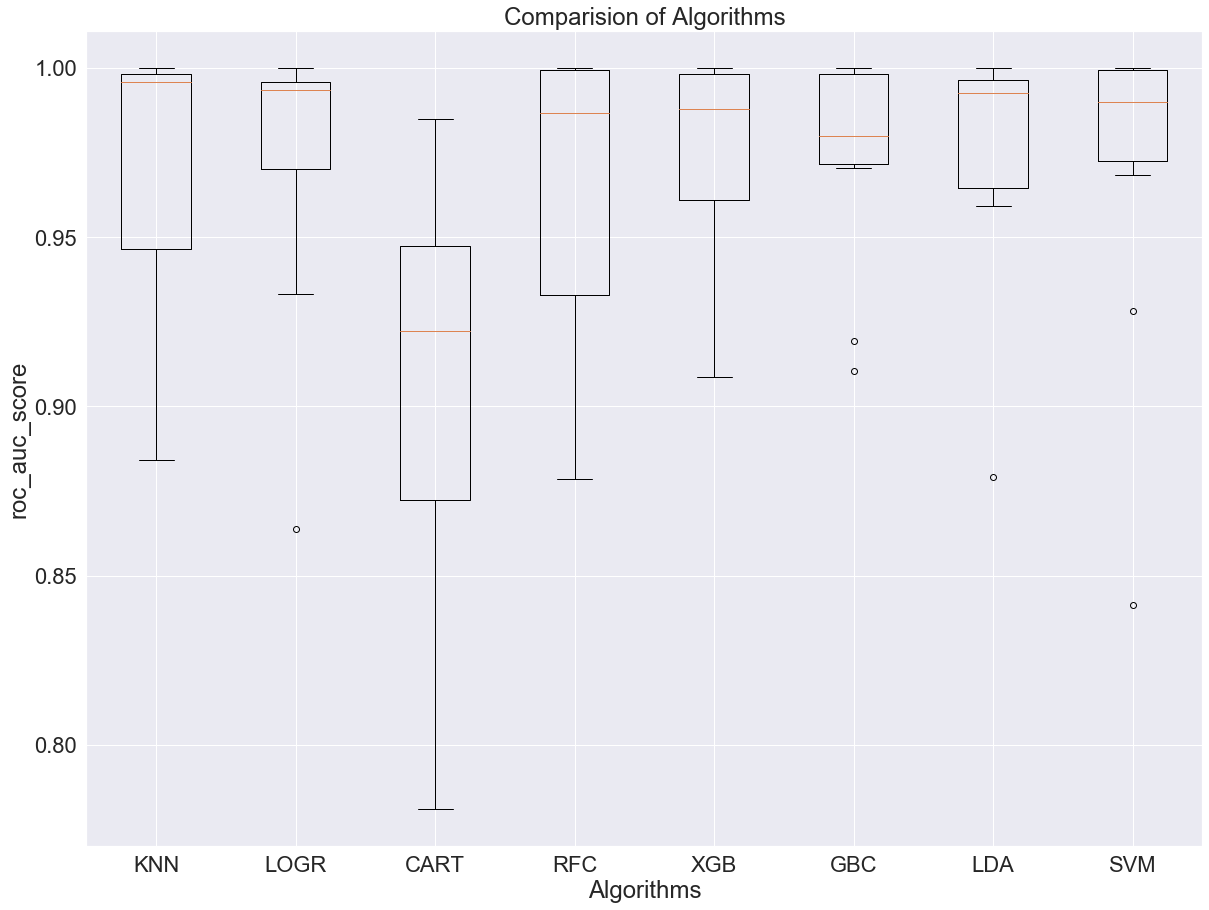

In [76]:
fig = plt.figure(figsize=(20,15))
plt.title('Comparision of Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('roc_auc_score')
plt.boxplot(results)
ax=fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

In [77]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [83]:
rfc=RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)
#Extracting Single Tree
estimator=rfc.estimators_[5]
from sklearn.tree import export_graphviz
#Export as dot file
export_graphviz(estimator, out_file='tree.dot', feature_names=X.columns.tolist(), class_names=['0', '1'], rounded=True,proportion=False,precision=2,filled=True)
#Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
#Display in Jupyter notebook
from IPython.display import Image
Image(filename='tree.png')